# Assignment 4
## Linear Regression 

In [1]:
# Importing libraries
import numpy as np # For linear algebra
import pandas as pd # Python's extensive data analyis toolkit

# Matolotlib for visualizations
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Seaborn for statistical insights
import seaborn as sns
import sklearn.cluster as skl

# PLotly libraries for interactive visualizations
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Scikit-Learn for regression 
from sklearn import linear_model

from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import scale

from statsmodels.formula.api import ols
import statsmodels.api as sm

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



## Analysing Data

In [2]:
data = pd.read_csv('begdata.csv')

Attribute Information:

No: row number<br/>
year: year of data in this row <br/>
month: month of data in this row <br/>
day: day of data in this row <br/>
hour: hour of data in this row <br/>
pm2.5: PM2.5 concentration (ug/m^3) <br/>
DEWP: Dew Point (â„ƒ) <br/>
TEMP: Temperature (â„ƒ) <br/>
PRES: Pressure (hPa) <br/>
cbwd: Combined wind direction <br/>
IWS: Cumulated wind speed (m/s) <br/>
IS: Cumulated hours of snow <br/>
IR: Cumulated hours of rain <br/>

In [3]:
data[['PMLVL','DEWP','TEMP','PRES','IWS','IS','IR']].describe()

PMLVL          DEWP          TEMP          PRES           IWS  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654     23.889140   
std       92.050387     14.433440     12.198613     10.268698     50.010635   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      137.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

                 IS            IR  
count  43824.000000  43824.000000  
mean       0.052734      0.194916  
std        0.760375      1.415867  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       27.000000     36.000000

In [4]:
data.head()

No  year  month  day  hour  PMLVL  DEWP  TEMP    PRES cbwd    IWS  IS  IR
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [5]:
data=data.dropna()

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



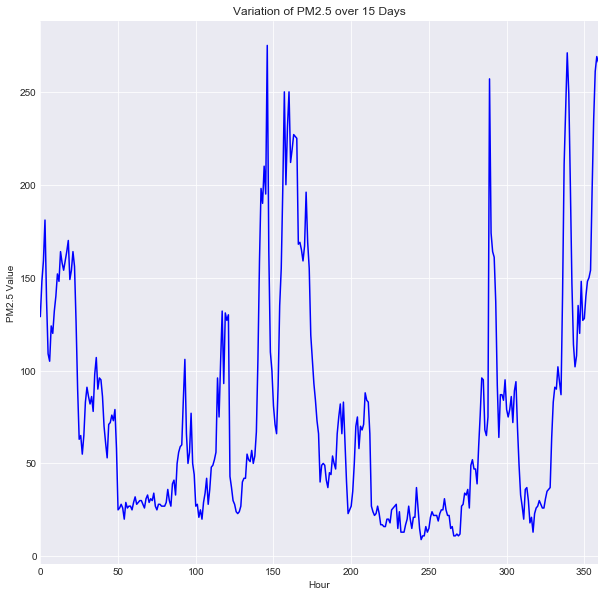

In [6]:
X= data['PMLVL'].dropna()
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.xlabel("Hour")
plt.ylabel("PM2.5 Value")
plt.title("Variation of PM2.5 over 15 Days")
sns.tsplot(data=X[:360],color='b')

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



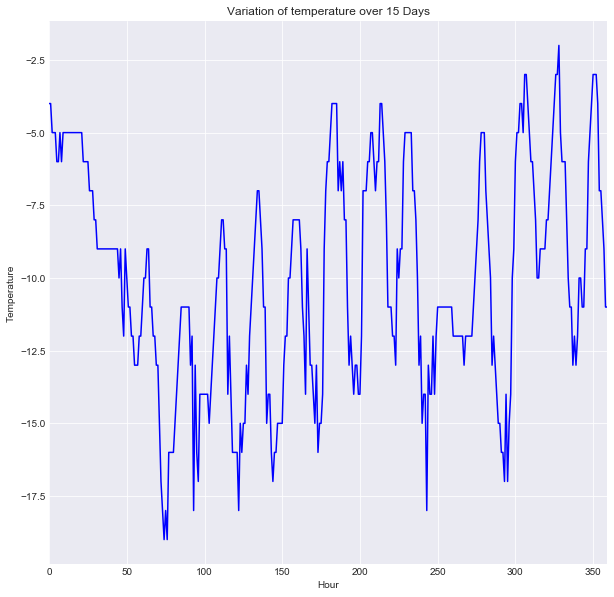

In [7]:
X= data['TEMP'].dropna()
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.xlabel("Hour")
plt.ylabel("Temperature")
plt.title("Variation of temperature over 15 Days")
sns.tsplot(data=X[:360],color='b')

In [8]:
# Create a trace
X=data['TEMP'].dropna()
y=data['TEMP'].index
trace = go.Scatter(
    x = y,
    y = X
)

dt = [trace]

iplot(dt)

In [9]:
# Create a trace
X=data['PMLVL'].dropna()
y=data['PMLVL'].index
trace = go.Scatter(
    x = y,
    y = X
)

dt = [trace]

iplot(dt)

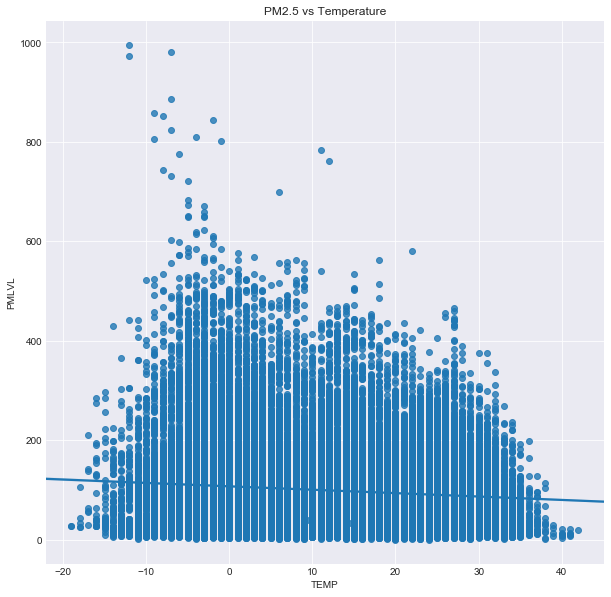

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.title("PM2.5 vs Temperature")
sns.regplot('TEMP','PMLVL',data)


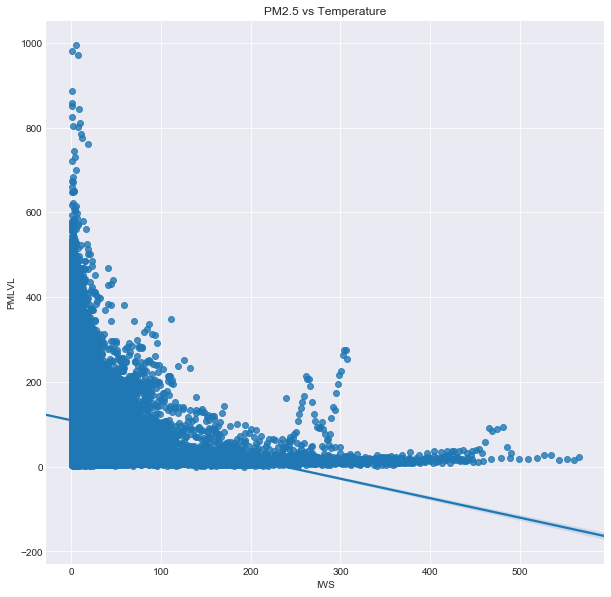

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.title("PM2.5 vs Temperature")
sns.regplot('IWS','PMLVL',data)

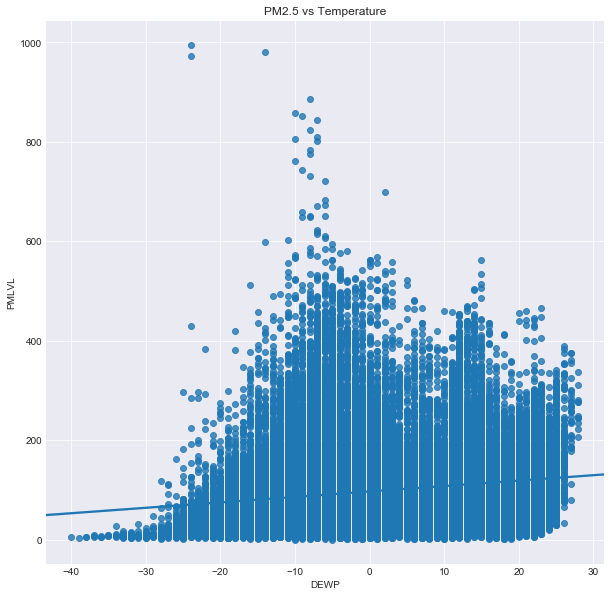

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.title("PM2.5 vs Temperature")
sns.regplot('DEWP','PMLVL',data)

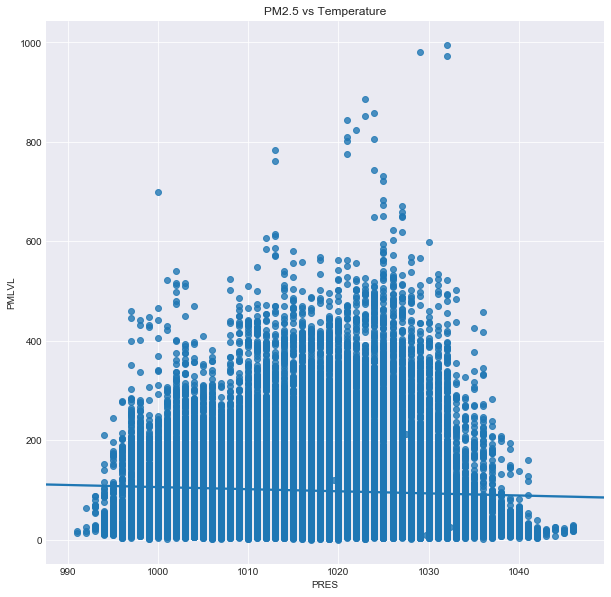

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.title("PM2.5 vs Temperature")
sns.regplot('PRES','PMLVL',data)

In [17]:
num_data= data[['PMLVL','DEWP','TEMP','PRES','IWS','IS','IR']]

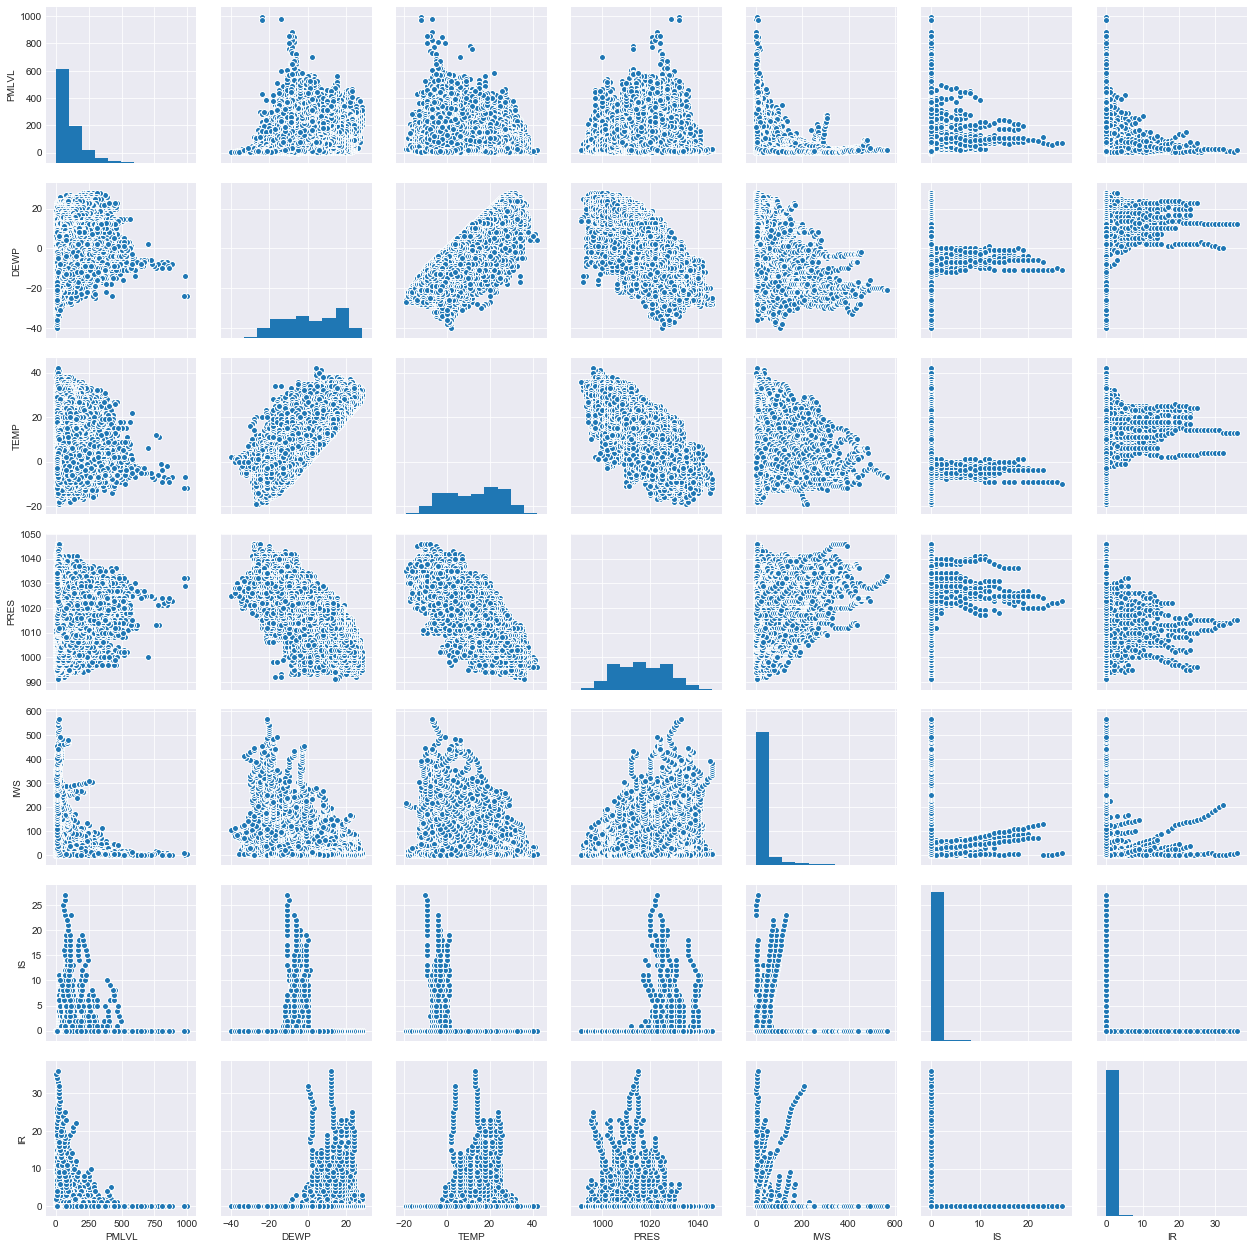

In [18]:
sns.pairplot(num_data)

## Clusters of Data

In [19]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels



### Birch 

In [20]:
labels=skl.Birch(n_clusters=5).fit(data['PMLVL'].values.reshape(-1, 1))

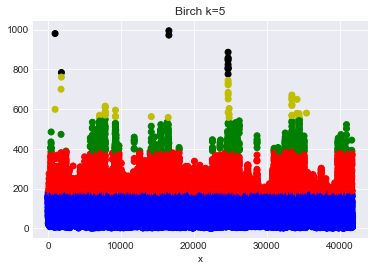

In [21]:
lbl = labels.labels_
x=np.linspace(0,(len(X)-1),len(X))
colors = set_colors(lbl)
plt.scatter(x,X, c=colors)
plt.title("Birch k=5")
plt.xlabel("x")
plt.show()

#### Scaled BIRCH

In [22]:
scaled_PMLVL= scale(data['PMLVL'])

In [23]:
labels=skl.Birch(n_clusters=5).fit(scaled_PMLVL.reshape(-1, 1))

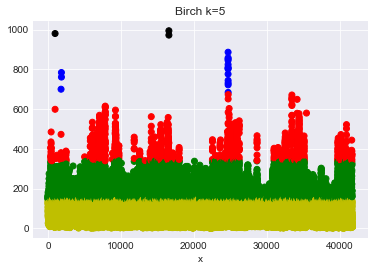

In [24]:
lbl = labels.labels_
x=np.linspace(0,(len(X)-1),len(X))
colors = set_colors(lbl)
plt.scatter(x,X, c=colors)
plt.title("Birch k=5")
plt.xlabel("x")
plt.show()

### K-Means 

In [25]:
labels=skl.KMeans(n_clusters=5).fit(X.values.reshape(-1, 1))

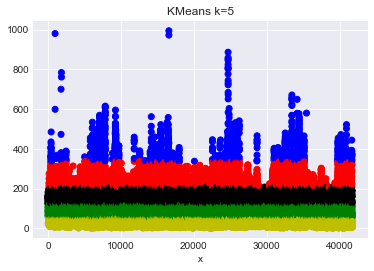

In [26]:
lbl = labels.labels_
x=np.linspace(0,(len(X)-1),len(X))
colors = set_colors(lbl)
plt.scatter(x,X, c=colors)
plt.title("KMeans k=5")
plt.xlabel("x")
plt.show()

#### Scaled KMeans

In [27]:
labels=skl.KMeans(n_clusters=5).fit(scaled_PMLVL.reshape(-1, 1))

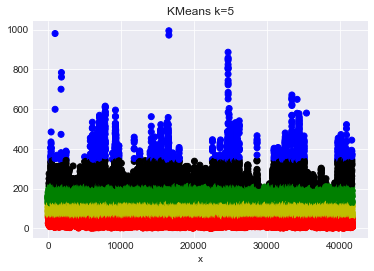

In [28]:
lbl = labels.labels_
x=np.linspace(0,(len(X)-1),len(X))
colors = set_colors(lbl)
plt.scatter(x,X, c=colors)
plt.title("KMeans k=5")
plt.xlabel("x")
plt.show()

*Do the clustering algorithms generate same clusters ?*<br/>
We can see that, k-Means and BIRCH do not generate same clusters in this case.

*Does scaling effect the clustering?*<br/>
BIRCH and scaled BIRCH also do not generate same clusters, whereas K-Means and scaled K-Means both genarate same clusters. 

*Does the clustering produce interesting groupings?*  <br/>
We can observe that clusters are almost similar to the groups in which the different levels of PM2.5 are classified according to health effects. 


In [29]:
labels.fit(np.array(data['PMLVL']).reshape(-1,1))
predict= labels.predict(np.array(data['PMLVL']).reshape(-1,1))
data['PollutionClass'] = pd.Series(predict, index=data.index)

In [30]:
data["PollutionClass"][data["PollutionClass"] == 2]= "Good"
data["PollutionClass"][data["PollutionClass"] == 0]= "Moderate"
data["PollutionClass"][data["PollutionClass"] == 3]= "USG"
data["PollutionClass"][data["PollutionClass"] == 1]= "Unhealthy"
data["PollutionClass"][data["PollutionClass"] == 4]= "VeryUnhealthy"

In [31]:
data.head()

No  year  month  day  hour  PMLVL  DEWP  TEMP    PRES cbwd   IWS  IS  IR  \
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

   PollutionClass  
24  VeryUnhealthy  
25  VeryUnhealthy  
26  VeryUnhealthy  
27  VeryUnhealthy  
28  VeryUnhealthy

In [32]:
data['PollutionClass'].value_counts()

Moderate         17573
Good             12367
VeryUnhealthy     7272
Unhealthy         3426
USG               1119
Name: PollutionClass, dtype: int64

### OLS Models

#### PM-Level vs Pressure

In [33]:
pollution_model = ols("PMLVL ~ PRES", data=data).fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PMLVL   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     93.56
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           4.16e-22
Time:                        17:41:25   Log-Likelihood:            -2.4804e+05
No. Observations:               41757   AIC:                         4.961e+05
Df Residuals:                   41755   BIC:                         4.961e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    528.0895     44.404     11.893      0.000     441.057     615.122
PRES          -0.4225      0.044     -9.673      0.000      -0.508      -0.337
==============================================================================
Omnibus:                    15699.056   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65850.082
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       7.931   Cond. No.                     1.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### PM-Level vs Temperature

In [34]:
pollution_model = ols("PMLVL ~ TEMP", data=data).fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PMLVL   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     345.1
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           1.02e-76
Time:                        17:41:25   Log-Likelihood:            -2.4792e+05
No. Observations:               41757   AIC:                         4.958e+05
Df Residuals:                   41755   BIC:                         4.959e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.1018      0.640    167.249      0.000     105.847     108.357
TEMP          -0.6845      0.037    -18.576      0.000      -0.757      -0.612
==============================================================================
Omnibus:                    14388.968   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54278.035
Skew:                           1.711   Prob(JB):                         0.00
Kurtosis:                       7.415   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### PM-Level vs Wind Speed

In [35]:
pollution_model = ols("PMLVL ~ IWS ", data=data).fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PMLVL   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2731.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:41:25   Log-Likelihood:            -2.4677e+05
No. Observations:               41757   AIC:                         4.935e+05
Df Residuals:                   41755   BIC:                         4.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.5845      0.484    226.280      0.000     108.635     110.534
IWS           -0.4597      0.009    -52.262      0.000      -0.477      -0.442
==============================================================================
Omnibus:                    15556.707   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66794.778
Skew:                           1.810   Prob(JB):                         0.00
Kurtosis:                       8.029   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dew-Point vs Pressure

In [36]:
pollution_model = ols("DEWP ~ PRES", data=data).fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DEWP   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                 6.391e+04
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:41:25   Log-Likelihood:            -1.5134e+05
No. Observations:               41757   AIC:                         3.027e+05
Df Residuals:                   41755   BIC:                         3.027e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1109.4338      4.382    253.199      0.000    1100.846    1118.022
PRES          -1.0898      0.004   -252.813      0.000      -1.098      -1.081
==============================================================================
Omnibus:                     1220.023   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.405
Skew:                          -0.415   Prob(JB):                    2.78e-280
Kurtosis:                       2.777   Cond. No.                     1.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Temperature vs Pressure

In [37]:
pollution_model = ols("TEMP ~ PRES -1", data=data).fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TEMP   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 4.189e+04
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:41:25   Log-Likelihood:            -1.6397e+05
No. Observations:               41757   AIC:                         3.279e+05
Df Residuals:                   41756   BIC:                         3.280e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PRES           0.0121   5.91e-05    204.678      0.000       0.012       0.012
==============================================================================
Omnibus:                    20656.279   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2355.622
Skew:                          -0.147   Prob(JB):                         0.00
Kurtosis:                       1.874   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dew-Point vs Temperature 

In [38]:
pollution_model = ols("TEMP ~ DEWP -1", data=data).fit()
pollution_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TEMP   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 3.203e+04
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:41:25   Log-Likelihood:            -1.6659e+05
No. Observations:               41757   AIC:                         3.332e+05
Df Residuals:                   41756   BIC:                         3.332e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DEWP           0.7875      0.004    178.961      0.000       0.779       0.796
==============================================================================
Omnibus:                     3400.287   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4287.059
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                       3.261   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe that, the value of r-squares is very small for:

**PM-Level vs Pressure**<br/>
**PM-Level vs Temperature**<br/>
**PM-Level vs Wind Speed**<br/>

It is observed that r-squared values are sufficiently large for :

**Dew-Point vs Pressure**<br/>
**Temperature vs Pressure**<br/>
**Dew-Point vs Temperature**<br/>

The highest r-squared value is for : **Temperature vs Pressure**

## Linear Regression 

### Linear Regression of Dew-Point and Temperature

In [39]:
TEMP = data[["TEMP"]] ## dependent
DEWP = data[["DEWP"]]## INDependent

X_train, X_test, y_train, y_test = train_test_split(DEWP, TEMP, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lm = linear_model.LinearRegression(normalize=True)
result = lm.fit(X_train,y_train)

print (result.intercept_, result.coef_)

y_pred = lm.predict(X_test)
print("R2 Score:"+str(r2_score(y_test,y_pred)))

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

(33405, 1) (33405, 1)
(8352, 1) (8352, 1)
(array([11.17209936]), array([[0.69314508]]))
R2 Score:0.6871475125804641
Mean squared error: 47.42


/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



#### Cross Validation

Cross-validated scores: [0.71968037 0.73006479 0.65192938 0.57346621 0.70934279 0.50926957]
Cross-Predicted Accuracy: 0.674793238283979


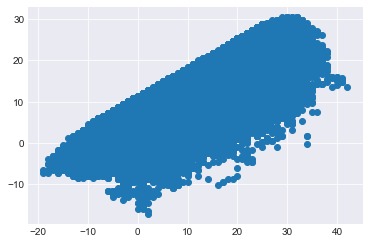

In [40]:
scores = cross_val_score(lm, DEWP, TEMP, cv=6)
print 'Cross-validated scores:', scores

predictions = cross_val_predict(lm, DEWP, TEMP, cv=6)
plt.scatter(TEMP, predictions)

accuracy = metrics.r2_score(TEMP, predictions)
print 'Cross-Predicted Accuracy:', accuracy

### Linear Regression of Temperature and Pressure

In [41]:
TEMP = data[["TEMP"]] ## dependent
PRES = data[["PRES"]]## INDependent

X_train, X_test, y_train, y_test = train_test_split(PRES, TEMP, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lm = linear_model.LinearRegression(normalize=True)
result = lm.fit(X_train,y_train)

print (result.intercept_, result.coef_)

y_pred = lm.predict(X_test)
print("R2 Score:"+str(r2_score(y_test,y_pred)))

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

(33405, 1) (33405, 1)
(8352, 1) (8352, 1)
(array([1006.53543023]), array([[-0.978043]]))
R2 Score:0.6838540920923508
Mean squared error: 47.08


#### Cross Validation

Cross-validated scores: [0.65899395 0.66326231 0.73043486 0.57740337 0.74074392 0.57704673]
Cross-Predicted Accuracy: 0.6782061661205554


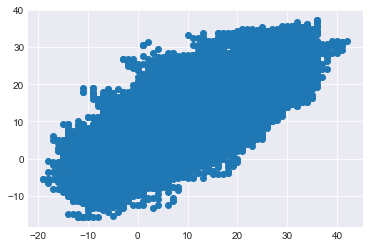

In [42]:
scores = cross_val_score(lm, PRES, TEMP, cv=6)
print 'Cross-validated scores:', scores

predictions = cross_val_predict(lm, PRES, TEMP, cv=6)
plt.scatter(TEMP, predictions)

accuracy = metrics.r2_score(TEMP, predictions)
print 'Cross-Predicted Accuracy:', accuracy

### Linear Regression of Dew-Point and Pressure

In [43]:
PRES = data[["PRES"]] ##Independent
DEWP = data[["DEWP"]]## Dependent

X_train, X_test, y_train, y_test = train_test_split(DEWP, PRES, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lm = linear_model.LinearRegression(normalize=True)
result = lm.fit(X_train,y_train)

print (result.intercept_, result.coef_)

y_pred = lm.predict(X_test)
print("R2 Score:"+str(r2_score(y_test,y_pred)))

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

(33405, 1) (33405, 1)
(8352, 1) (8352, 1)
(array([1017.41740192]), array([[-0.55466824]]))
R2 Score:0.6058732580839079
Mean squared error: 41.86


#### Cross Validation

Cross-validated scores: [0.57832847 0.64185374 0.56866353 0.45603579 0.68675388 0.51840196]
Cross-Predicted Accuracy: 0.5995553202738193


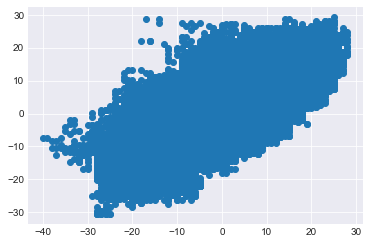

In [53]:
scores = cross_val_score(lm, PRES, DEWP, cv=6)
print 'Cross-validated scores:', scores

predictions = cross_val_predict(lm, PRES, DEWP, cv=6)
plt.scatter(DEWP, predictions)

accuracy = metrics.r2_score(DEWP, predictions)
print 'Cross-Predicted Accuracy:', accuracy

### Linear Regression of Dew-Point and Pressure with Temperature 

In [45]:
TEMP = data[["TEMP"]] ## dependent
var = data[["PRES", "DEWP"]]## INDependent

X_train, X_test, y_train, y_test = train_test_split(var, TEMP, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

lm = linear_model.LinearRegression(normalize=True)
result = lm.fit(X_train,y_train)

print (result.intercept_, result.coef_)

y_pred = lm.predict(X_test)
print("R2 Score:"+str(r2_score(y_test,y_pred)))

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

(33405, 2) (33405, 1)
(8352, 2) (8352, 1)
(array([573.46038761]), array([[-0.55266331,  0.38751702]]))
R2 Score:0.76594566738007
Mean squared error: 34.90


#### Cross Validation

Cross-validated scores: [0.77847419 0.76973579 0.78816377 0.69166166 0.78456914 0.6543081 ]
Cross-Predicted Accuracy: 0.7616707841480235


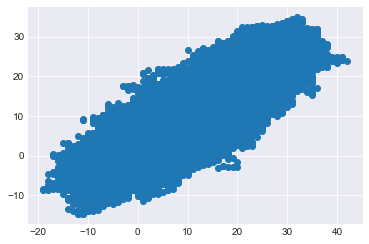

In [46]:
scores = cross_val_score(lm, var, TEMP, cv=6)
print 'Cross-validated scores:', scores

predictions = cross_val_predict(lm, var, TEMP, cv=6)
plt.scatter(TEMP, predictions)

accuracy = metrics.r2_score(TEMP, predictions)
print 'Cross-Predicted Accuracy:', accuracy

*Is the relationship significant?* <br/>
We can see that the relationship is pretty significant as we are getting a 77% level of accuract in out prediction.

*Are any model assumptions violated?*<br/>
No, model assumptions are not voilated 

*Is there any multi-colinearity in the model?* <br/>
Yes, there is multi colinearity in the model, as we can predict the values with about 68% accuracy in two cases.

*In the multiple regression models are predictor variables independent of all the other predictor variables?* <br/>
No, it depends on model. But in this case, some are independent of all the other predictor variables, some are not.

*In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model*<br/>
We have done this above, See: Dew-Point and Temperature Linear regression above.

*Does the model make sense?* <br/>
Yes, as we have a pretty decent level of accuracy in this model.

*Cross-validate the model. How well did it do?*<br/>
We have done cross validation above. We can see that there is slight improvement in the model after cross validation. 


## Regularization

### Ridge Regression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(var, TEMP, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

ridgeReg = Ridge(alpha=1.0)
res = ridgeReg.fit(X_train,y_train) 

print (res.intercept_, res.coef_)

y_pred = ridgeReg.predict(X_test)
print("R2 Score:"+str(r2_score(y_test,y_pred)))

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

(33405, 2) (33405, 1)
(8352, 2) (8352, 1)
(array([576.28879106]), array([[-0.55543826,  0.38628621]]))
R2 Score:0.7712438161119828
Mean squared error: 34.11


### Lasso Regression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(var, TEMP, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lassoReg = Lasso(alpha=1.0)
resul = lassoReg.fit(X_train,y_train) 

print (resul.intercept_, resul.coef_)

y_pred = ridgeReg.predict(X_test)
print("R2 Score:"+str(r2_score(y_test,y_pred)))

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

(33405, 2) (33405, 1)
(8352, 2) (8352, 1)
(array([564.9247612]), array([-0.54426348,  0.38775641]))
R2 Score:0.7665471462744212
Mean squared error: 34.18


*Does regularization help with creating models that validate better on out of sample data?* <br/>
Yes, we can see that accuracy is increased by about 1% due to regularization of above models. 

## Logistic Regression 

In [49]:
indVar=data[["IWS","DEWP", "TEMP","PRES"]]
depVar= data["PollutionClass"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(indVar, depVar, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

logreg= LogisticRegression(multi_class="multinomial",solver ='newton-cg',max_iter=25)
modl=logreg.fit(indVar, depVar)

y_pred = logreg.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

report = classification_report(y_test, y_pred)
print(report)

(33405, 4) (33405,)
(8352, 4) (8352,)
[[1490 1019    0   42    0]
 [ 911 2522    0    8    0]
 [ 135   26    0   49    0]
 [ 501  140    0   80    0]
 [ 939  437    0   51    2]]
               precision    recall  f1-score   support

         Good       0.37      0.58      0.46      2551
     Moderate       0.61      0.73      0.66      3441
          USG       0.00      0.00      0.00       210
    Unhealthy       0.35      0.11      0.17       721
VeryUnhealthy       1.00      0.00      0.00      1429

  avg / total       0.57      0.49      0.43      8352



/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [51]:
scores = cross_val_score(logreg, indVar, depVar, cv=5)
print 'Cross-validated scores:', scores


/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



Cross-validated scores: [0.4960498  0.48736981 0.47120105 0.48754491 0.47490717]


/Users/mahajan/Pratik-Files/Northeastern/ADS/Assignment4/venv/lib/python2.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



In [52]:
metrics.accuracy_score(y_test, y_pred)

0.49018199233716475